In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**numpy는 수치 연산에서 가장 기본적인 것을 제공하며, pandas는 자료 탐색과 정리에 있어서 유용한 모듈입니다.<br>
matplotlib은 데이터 시각화에 도움을 주고, seabond은 matplotlib에서 제공하지 않는 고급 통계 그래프를 그려 시각화 기능을 제공하는 모듈입니다.**

In [22]:
data=pd.read_csv("train.csv")

**data라는 변수를 설정해서 간단하게 train.csv파일을 읽어들일 수 있게 되었습니다.**

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**head함수를 사용하여 data의 데이터를 시작부터 5줄까지 출력하게 됩니다.<br>우리가 다루는 문제에서 feature는 Pclass, Age, SibSp, Parch, Fare 이며, 예측하려는 target label 은 Survived 입니다.**

In [24]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**isnull메서드를 사용하여 누락값을 확인할 수 있는데 sum메서드를 같이 써주면서 누락값의 총 합을 알 수 있습니다.**

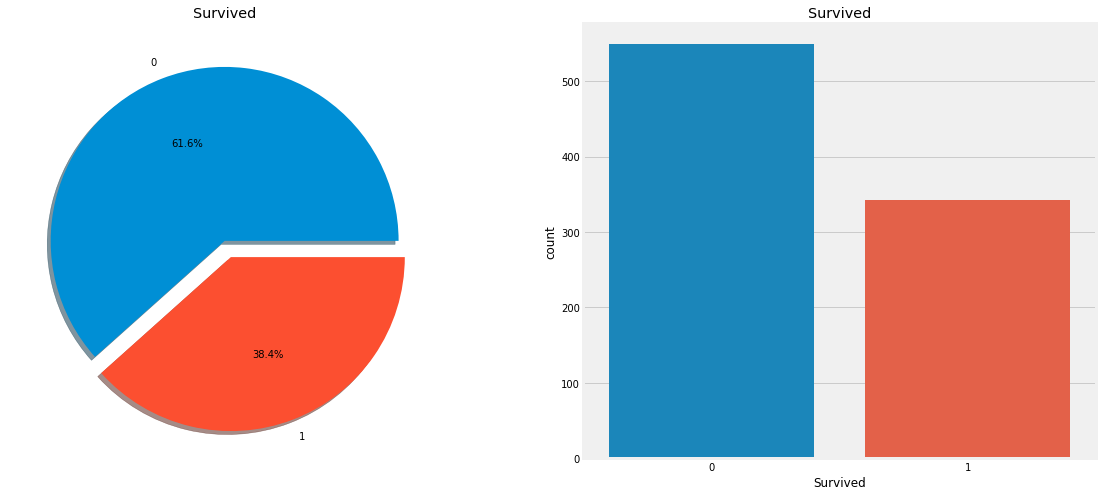

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**그렇다면 얼마나 많은 사람들이 살아남을까요?? matplotlib을 활용하여 시각적으로 나타냈습니다.<br><br>사고에서 살아남은 승객이 많지 않은 것이 분명합니다.<br>트레이닝 세트 승객 891명 중 350명만이 살아남았습니다. 즉, 전체 훈련 세트의 38.4%만이 추락에서 살아남았는데요. 우리는 데이터에서 더 나은 통찰력을 얻고 승객의 어떤 부류가 살아남았는지 그리고 누가 살아남지 못했는지 알아보기 위해 더 많은 것을 파헤쳐야 합니다.<br><br>데이터셋의 여러 변수를 사용하여 생존율을 확인할 것입니다. 몇 가지 특징으로는 성별, 출발항, 나이 등이 있습니다.**

*Sex--> Categorical Feature*

In [26]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**위와같이 데이터를 성별과 생존자로 그룹을 나눠줬습니다.**

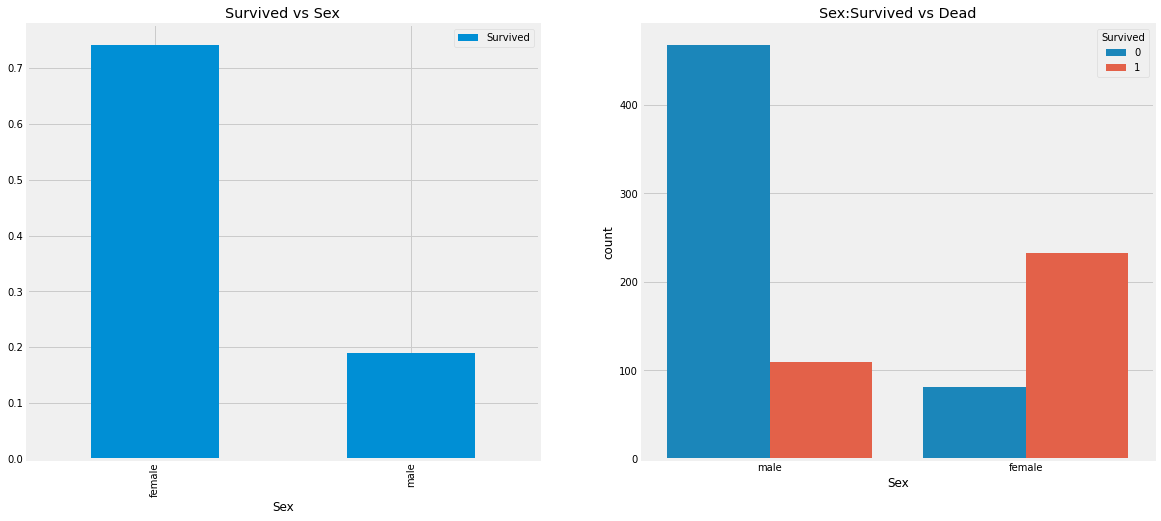

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

**이 그래프는 흥미로워 보입니다. 배에 타고 있는 남자들의 수가 여자들의 수보다 훨씬 더 많은데요 여전히 구조된 여성의 수는 남성 구조된 사람의 거의 두 배입니다. 배에 탑승한 여성의 생존율은 75%인 반면 남성은 18~19%입니다.<br><br>
이것은 모델링에 매우 중요한 기능인 것 같습니다. 근데 이게 베스트일까요? 다른 변수를 확인해봅시다!**

*Pclass --> Ordinal Feature*

In [28]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**위와 같이 도표에 style.background_gradient를 활용해서 각 도표의 비율만큼 배경색의 차이를 둘 수 있습니다. <br>
Pclass는 좌석 등급으로 Survived에서 0은 사망이고, 1은 생존이라는 의미입니다.**

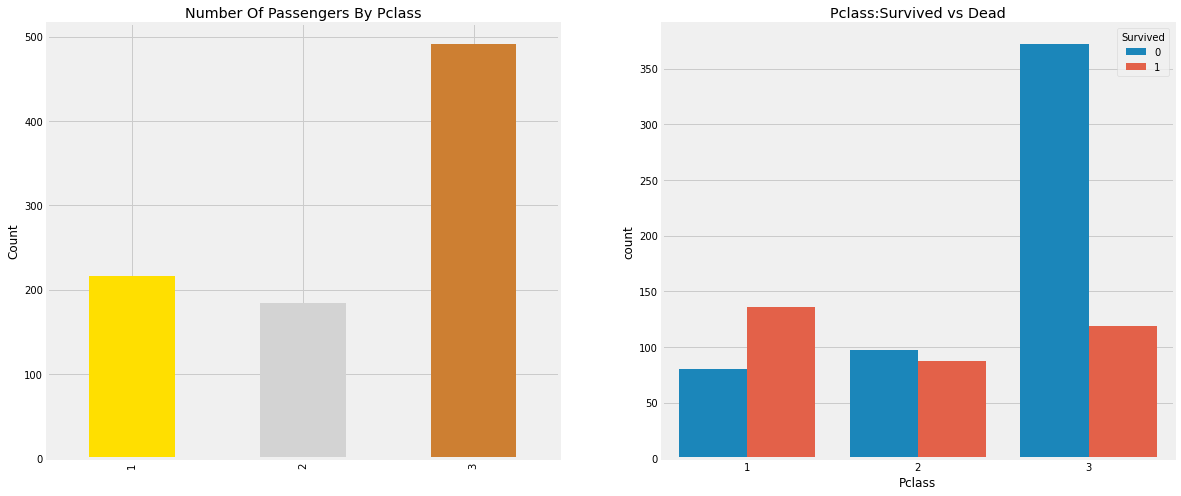

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

**사람들은 돈으로 모든 걸 살 수는 없다고 말한다. 하지만 P 클래스 1의 Passenegers는 구조하는 동안 매우 높은 우선순위를 부여받았음을 알 수 있습니다. P클래스 3의 탑승자 수는 훨씬 많았음에도 불구하고 생존자 수는 25% 정도로 매우 적습니다.<br><br>
P클래스 1% 생존율은 약 63%, P클래스2 생존율은 약 48%입니다. 그래서 돈과 지위가 중요합니다.<br><br>
좀 더 자세히 살펴보고 다른 흥미로운 관측치를 확인합니다. 성별과 좌석 등급을 묶어 생존율을 확인해봅시다!** 


In [30]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

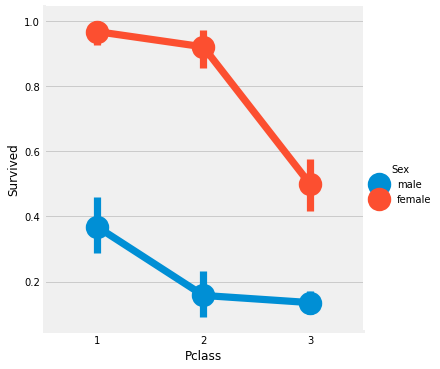

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

**우리는 factorplot을 사용했는데, 이유는 categorical value의 분리를 쉽게 해주기 때문입니다.<br><br>
crosstab과 factorplot을 보면, P클래스1 여성 94명 중 3명만이 사망했기 때문에 P클래스1 여성의 생존율은 약 95-96%라는 것을 쉽게 추론할 수 있습니다.<br><br>
P클래스와 상관없이 구조 과정에서 여성이 최우선 순위로 주어진 것은 분명하다. 심지어 P클래스 1의 남자들도 생존율이 매우 낮습니다.<br><br>
P클래스도 중요한 기능인 것 같아 보입니다. 다른 변수를 분석합니다.**

*Age--> Continous Feature*

In [32]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


**가장 나이가 많은 승객은 80살<br>
가장 나이가 어린 승객은 0.42살<br>
승객의 평균 나이는 29살이라고 합니다.**

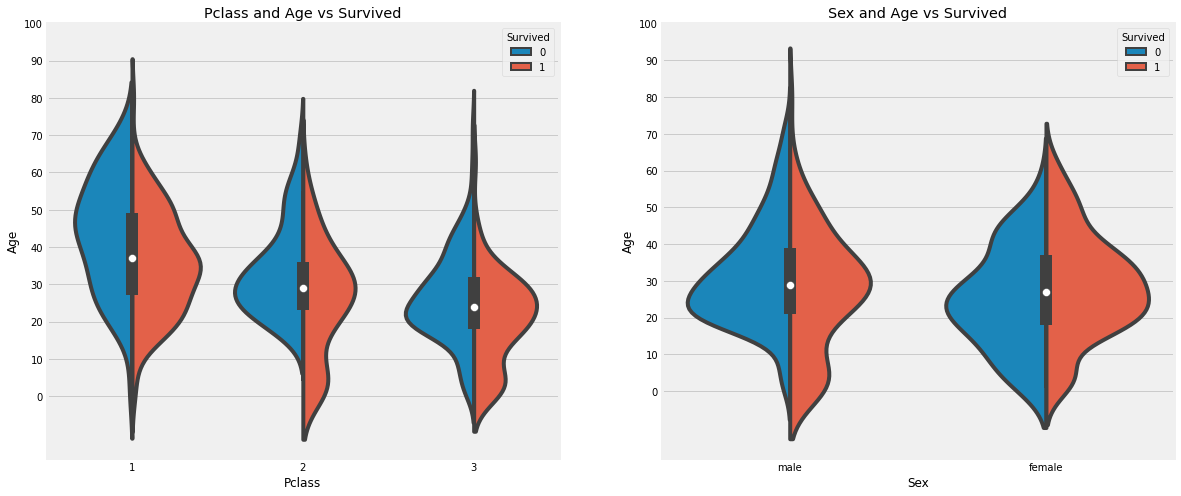

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**observations:<br>
1)P클래스에 따라 어린이 수가 증가하며, 10세 미만 승객(즉, 어린이)의 생존율은 P클래스에 관계없이 양호한 것으로 보입니다<br>
2)P클래스1부터 20~50세의 승객 생존 확률은 높으며, 여성이 남성보다 더욱 높다<br>
3)남성의 경우 나이가 들수록 생존 확률이 감소합니다**<br><br>

**앞에서 살펴본 바와 같이 연령 변수는 177개의 Null 값을 가집니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 사용 기간을 할당할 수 있습니다<br>
하지만 문제는 다양한 연령대의 사람들이 많이 있었다는 것이다. 평균 연령이 29세인 4살짜리 아이를 배정할 수는 없습니다. 승객이 연령층을 거짓말을 하는지 알 수 있는 방법이 있나요?<br>
네 이름 변수로 확인할 수 있습니다. 변수를 살펴보면, 우리는 그 이름들이 Mr/Mrs와 같은 호칭을 가지고 있음을 알 수 있습니다. 따라서 Mr와 Mrs의 평균값을 각 그룹에 할당할 수 있습니다.<br>**

In [34]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

**자, 여기 정규 표현식을 사용하고 있습니다. [A-Za-z]+) 즉, A-Z 또는 a-z 사이에 있는 문자열과 .(점) 뒤에 오는 문자열을 찾는 것입니다! 이름에서 이니셜을 추출했습니다.**

In [35]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


**Mlle이나 Mme처럼 Miss의 철자가 틀린 이니셜이 있습니다. 틀린 이니셜을 지닌 value를 other values로 대체하겠습니다**

In [36]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [37]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**데이터를 이니셜로 나누어 나이의 평균을 내어 다시 묶어주었습니다**

*Filling NaN Ages*

In [38]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [39]:
data.Age.isnull().any() #So no null values left finally

False

**데이터의 연령을 바탕으로 결측치가 있는지 any메서드로 알아보았지만 false가 나오면서 이제는 결측치가 하나도 없다는 것이 증명되었습니다**

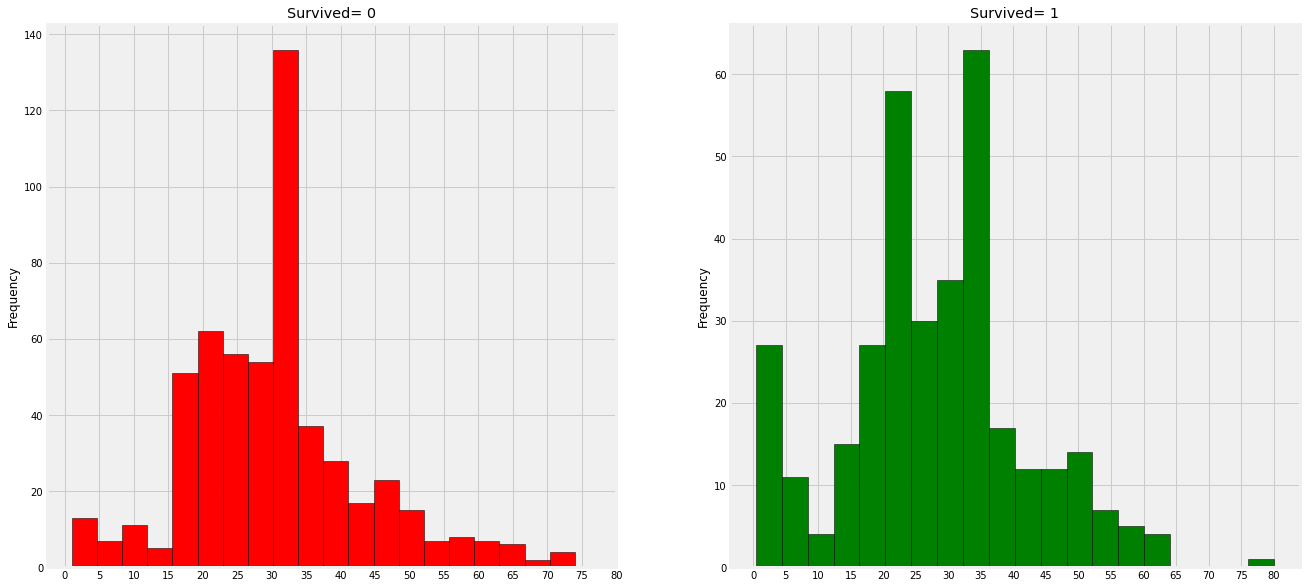

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Observations:<br>
1)유아(5세미만)가 대량으로 구조되었습니다(여성 및 아동 우선 정책)<br>
2)가장 나이 많은 승객은 구조되었습니다(80살)<br>
3)최대 사망자 연령대는 30~40세였다**

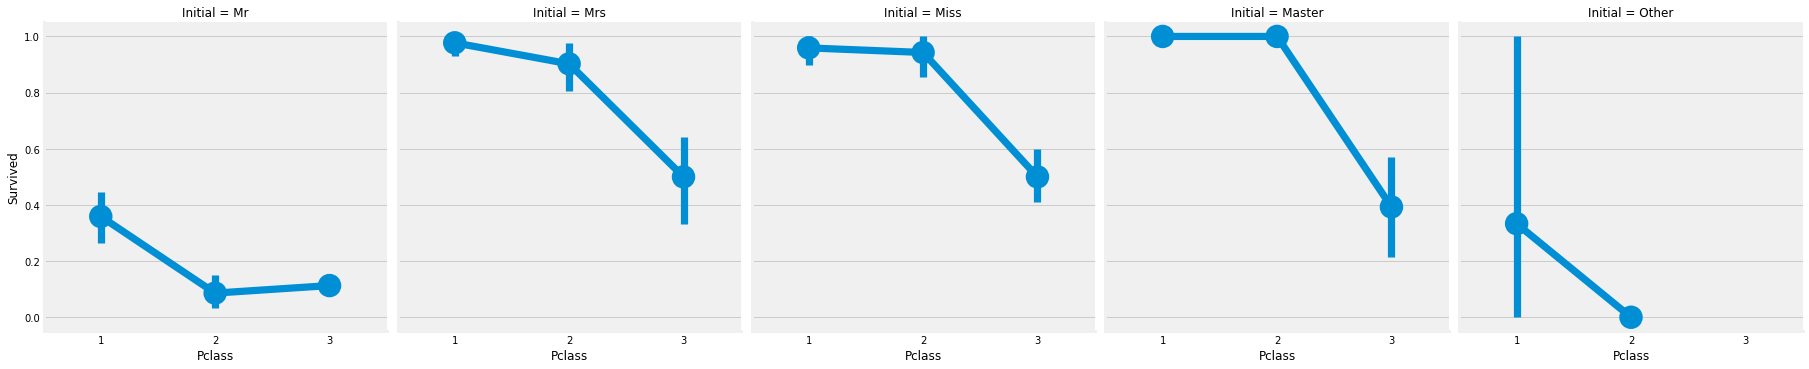

In [41]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

**위 그래프를 바탕으로 여성과 아동 우선 정책은 계급에 관계없이 적용되었다는 것을 알 수 있었습니다.**

*Embarked--> Categorical Value*

In [42]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

**이번에도 역시 crosstab 함수를 이용해서 행과 열의 데이터에 따른 교차표를 나타내는데 출항지라는 요소가 추가되었습니다.** 

*Chances for Survival by Port Of Embarkation*

**출항지에 따른 생존 가능성을 알아보겠습니다**

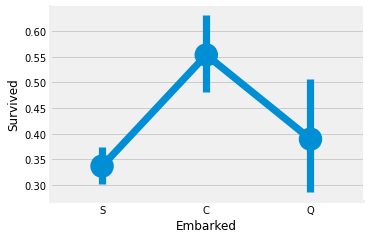

In [43]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

**C항구(=Cherbourg)는 생존 확률이 0.55로 안팎으로 가장 높고 S항구(=Southampton)은 가장 낮습니다**

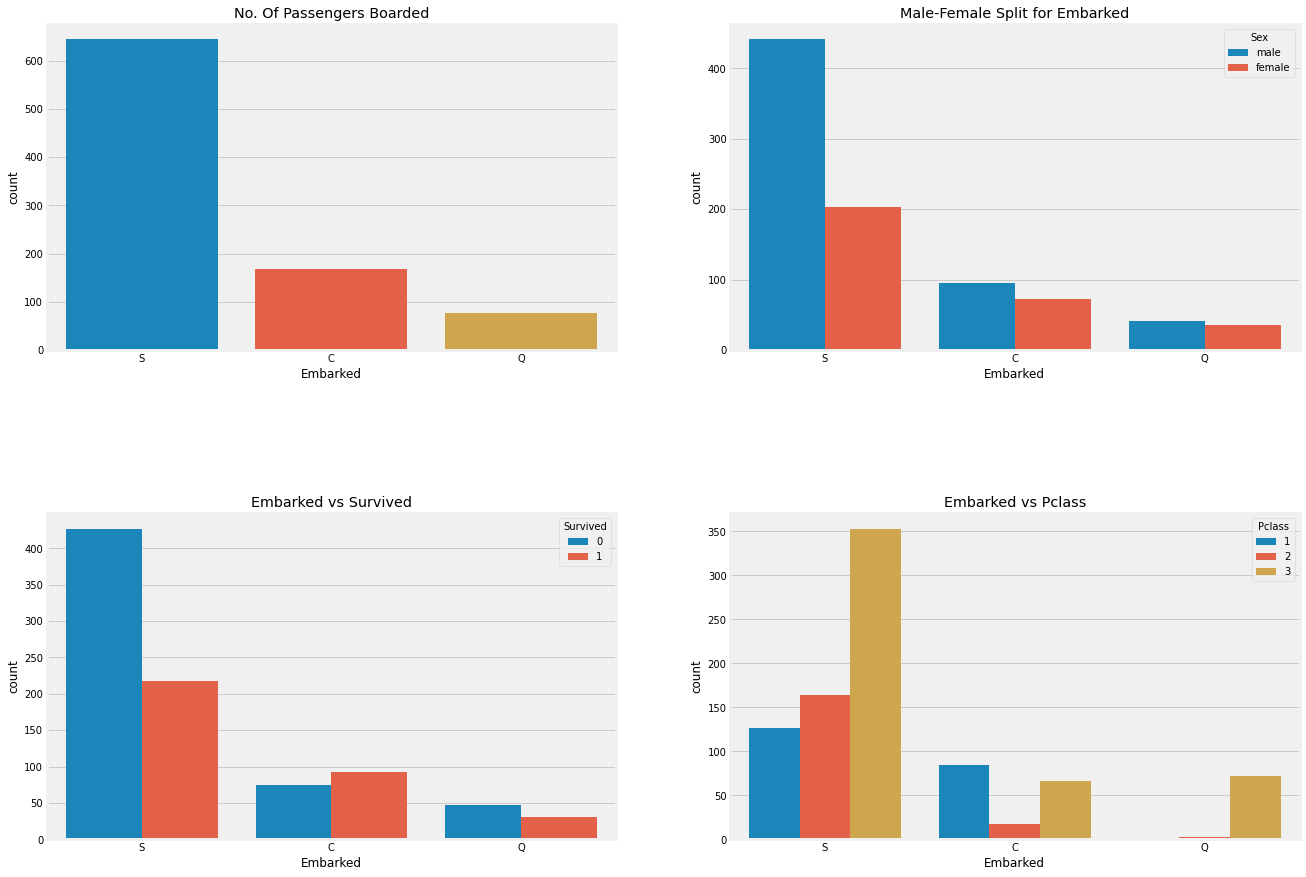

In [44]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observations:**<br>
**1)S항구에서 최대 승객이 탑승했습니다. 그들의 대부분은 P클래스3 출신입니다.**<br>
**2)C항구에서 온 승객들 중 상당수가 살아남은 것으로 보아 운이 좋은 것으로 보입니다. 그 이유는 P클래스1과 P클래스2 승객 모두를 구조한 것일 수 있습니다.**<br>
**3)S항구는 부유한 사람들의 대다수가 탑승한 항구를 바라본다. P클래스3에서 81% 안팎의 승객들이 살아남지 못했기 때문에 아직 생존 가능성은 낮습니다.**<br>
**4)Q항구의 승객은 거의 95%가 P클래스3 출신이었습니다.**<br>

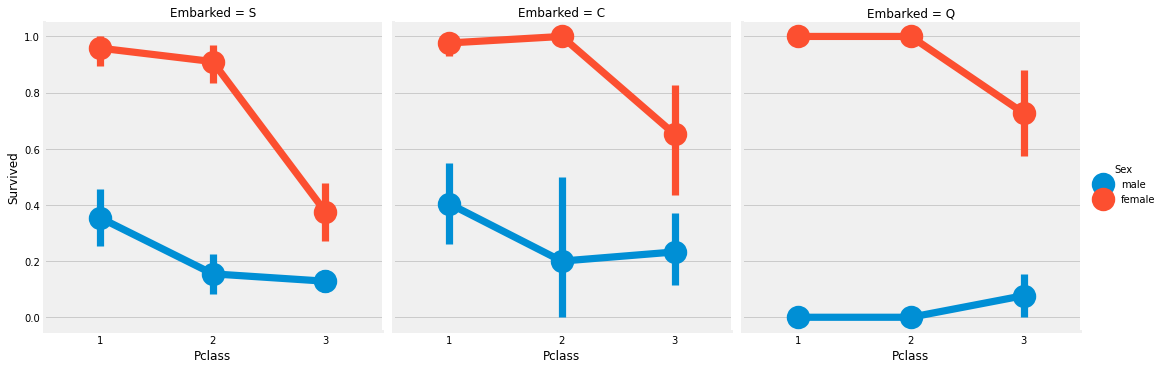

In [45]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**Observations:<br>**
**1)Pclass에 관계없이 Pclass1과 Pclass2의 생존 확률은 여성의 경우 거의 1입니다.**<br>
**2)S항구는 남녀 모두 생존율이 매우 낮기 때문에 Pclass3 승객에게는 매우 불행한 것 같습니다.**<br>
**3)Q항구는 거의 모든 것이 Pclass 3에서 나왔기 때문에 남성에게 가장 불행한 것 같습니다.**<br>

*Filling Embarked NaN*<br>
**S항구에서 최대 승객이 탑승한 것으로 보아 NaN을 S로 대체합니다.**

In [46]:
data['Embarked'].fillna('S',inplace=True)

In [47]:
data.Embarked.isnull().any()# Finally No NaN values

False

**데이터의 항구를 바탕으로 결측치가 있는지 any메서드로 알아보았지만 false가 나오면서 이제는 NaN values가 하나도 없다는 것이 증명되었습니다**

*SibSip-->Discrete Feature*<br>
**탑승객이 독신인지 가족과 함께 탑승했는지 표현해주는 feature입니다.**<br>
**형제 = 형제, 자매, 의붓동생, 의붓언니**<br>
**배우자 = 남편, 아내**

In [48]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


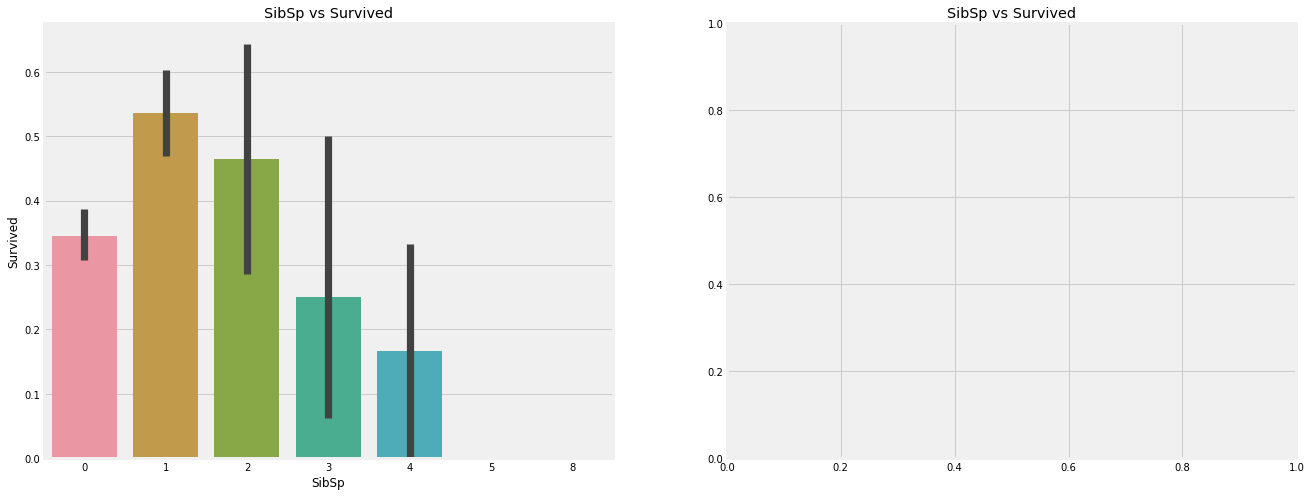

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [50]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:<br>
barplot 및 factorplot은 승객이 형제 없이 혼자 탑승한 경우 생존률이 34.5%임을 보여 줍니다. 형제의 수가 증가하면 그래프는 대략적으로 감소합니다. 즉, 만약 내게 가족이 있다면, 나는 먼저 나를 구하는 대신 그들을 구하려고 노력할 것이다. 놀랍게도 5~8명으로 구성된 가족의 생존률은 0%입니다. 그 이유는 P class일까요?<br>
맞습니다! 그 이유는 P클래스 때문입니다. crosstab은 가족을 4명 이상 가진 사람이 모두 P클래스3에 속했음을 나타냅니다. P클래스3(4명 이상)의 대가족이 모두 사망할 때가 임박했습니다.**

*Parch*

In [51]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


**다시 crosstab을 보면 대가족이 P클래스 3에 속했음을 알 수 있습니다.**

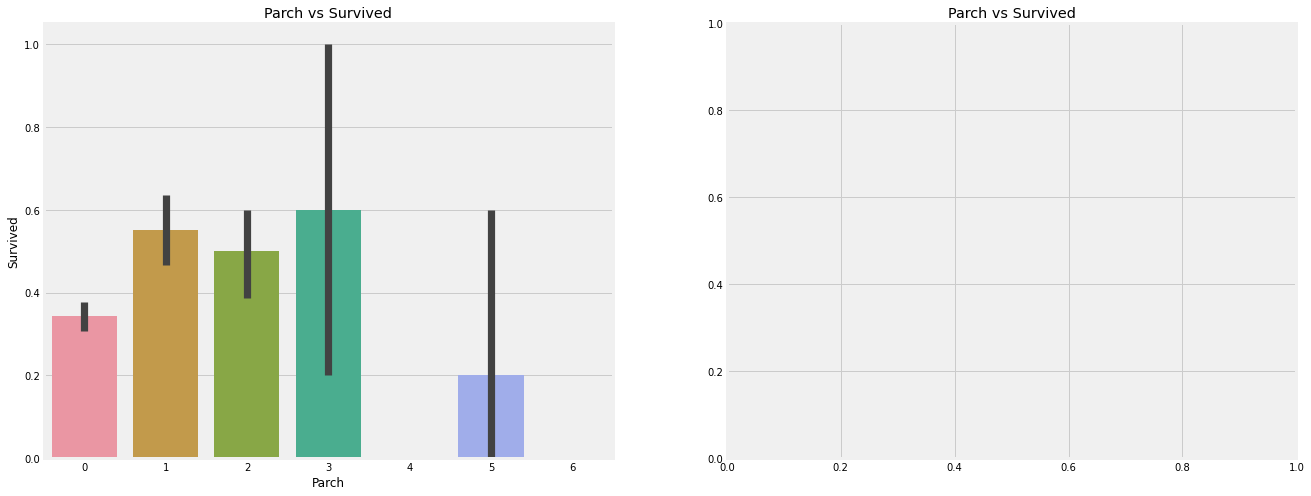

In [52]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

**Observations:<br>
여기에서도 결과는 꽤 비슷하다. 부모를 태운 승객은 생존 가능성이 더 크다. 하지만 숫자가 늘어날수록 줄어든다.**<br>
**생존 확률은 배에 부모 1-3명이 타고 있는 사람이 좋다. 혼자 있는 것 또한 치명적인 것으로 판명되고 누군가가 배에 4명 이상의 부모를 태우면 생존 가능성이 줄어든다.**

*Fare--> Continous Feature*

In [53]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


**가장 낮은 요금은 0.0이었습니다**

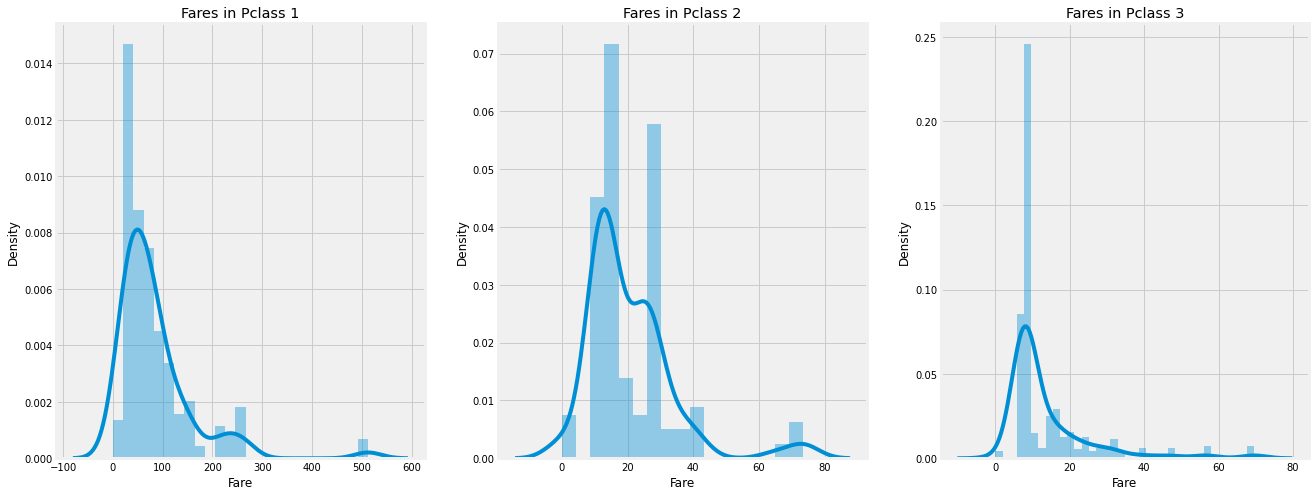

In [54]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

**P클래스1의 승객 운임 분포가 큰 것으로 보이며 이 분포는 기준이 줄어들면서 감소세를 지속하고 있습니다. <br>이 또한 연속적이기 때문에 binning을 사용하여 이산값으로 변환할 수 있습니다.**

**모든 features에 대한 요약 관찰:<br>
성별: 여성의 생존 확률은 남성과 비교했을 때 높다.**<br>
**P클래스: 일등석 승객이 되면 생존 가능성이 높아진다는 추세가 뚜렷합니다. P클래스3의 생존 비율이 매우 낮습니다. 여성의 경우 P클래스1에서 생존할 확률은 거의 1이며 P클래스2에서도 생존 확률이 높습니다.**<br>
**나이: 5-10세 미만의 어린이는 생존 가능성이 높습니다. 15세에서 35세 사이의 승객들이 많이 죽었습니다.**<br>
**출항지: 이것은 매우 흥미로운 features입니다. Pclass1 승객의 대다수가 S에 올랐음에도 불구하고 C에서 생존할 가능성이 더 좋아 보입니다. Q의 승객은 모두 P클래스3에서 왔습니다.**<br>
**Parch+SibSp: 1-2명의 형제자매, 배우자 또는 1-3명의 부모가 혼자이거나 대가족이 함께 여행하는 것보다 더 큰 생존 가능성을 보여줍니다.**

*Correlation Between The Features*

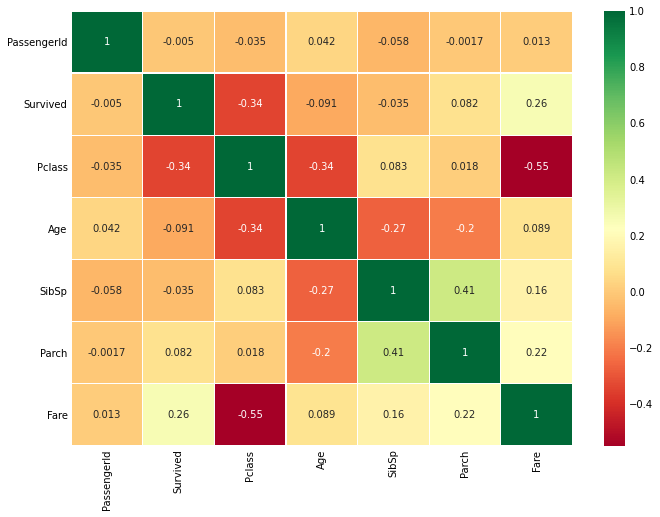

In [55]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Heatmap 해석<br>
우리가 알파벳이나 문자열의 상관관계를 알 수 없는 것이 명백하기 때문에 가장 먼저 주목해야 할 것은 숫자적 features만을 비교한다는 것입니다. 그림을 이해하기 전에 정확한 상관 관계가 무엇인지 살펴보겠습니다.**

**양의 상관 관계: feature A가 증가하면 feature B가 증가하면 양성 상관 관계입니다. 값 1은 완벽한 양의 상관 관계를 의미합니다.**

**음의 상관 관계: feature A가 증가하면 feature B가 감소하면 서로 음의 상관 관계가 있습니다. 값이 -1이면 완벽한 음의 상관 관계를 의미합니다.**

**이제 두 features가 매우 또는 완벽하게 상호 연관되어 있기 때문에 한 features의 증가가 다른 features의 증가로 이어진다고 가정해 보겠습니다. 이는 두 features 모두 매우 유사한 정보를 포함하고 있으며 정보의 변동이 거의 없거나 전혀 없음을 의미합니다. 두 가지 모두 거의 동일한 정보를 포함하고 있기 때문에 이를 MultiColinerity(=다중공선성)라고 합니다.**

**그럼 둘 중 하나가 중복이니 둘 다 사용해야 할까요? 모델을 만들거나 교육하는 동안 중복된 features를 제거하도록 노력해야 합니다. 중복된 features는 교육 시간과 많은 이점을 줄일 수 있기 때문입니다.**

**위의 열 지도를 보면 features가 크게 상관되어 있지 않다는 것을 알 수 있습니다. 가장 높은 상관관계는 SibSp와 Parchi 0.41이다. 그래서 모든 features를 수행할 수 있습니다.**

*Part2: Feature Engineering and Data Cleaning<br>*
**Feature Engineering이란 무엇입니까?**

**features가 포함된 데이터셋이 제공될 때마다 모든 features가 중요한 것은 아닙니다. 삭제해야 할 중복 features가 많을 수 있습니다. 또한 우리는 다른 features에서 정보를 관찰하거나 추출하여 새로운 features를 얻거나 추가할 수 있습니다.**

**Name Feature를 사용하여 초기 feature를 가져오는 경우를 예로 들 수 있습니다. 새로운 feature을 사용할 수 있는지 확인하고 몇 가지  feature를 제거할 수 있는지 알아보겠습니다. 또한 기존에 관련  feature을 예측 모델링에 적합한 형태로 전환할 것입니다.**

*Age_band*<br>
**Age feature 문제:
앞서 언급했듯이 나이는 연속적인 feature이며, 머신 러닝 모델의 연속적인 변수에 문제가 있습니다.**

**예시 : 만약 내가 스포츠인을 성별로 분류하거나 배열하라고 한다면, 우리는 그들을 남성과 여성으로 쉽게 구분할 수 있습니다.**

**내가 그들을 나이별로 묶으라고 한다면, 어떻게 하겠습니까? 30명일 경우 30개의 age values가 있을 수 있다는 문제가 있습니다.**

**이러한 연속값을 Binning 또는 Normalization으로 범주형 값으로 변환해야 합니다. binning을 사용해서. 즉, 연령 범위를 단일 bin으로 그룹화하거나 단일 값을 할당합니다.**

**승객의 최대 연령은 80세이기 때문에 범위를 0-80에서 5개의 bin으로 나눕시다. 즉 80/5=16입니다. bin의 사이즈는 16이 되겠습니다.**

In [56]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [57]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


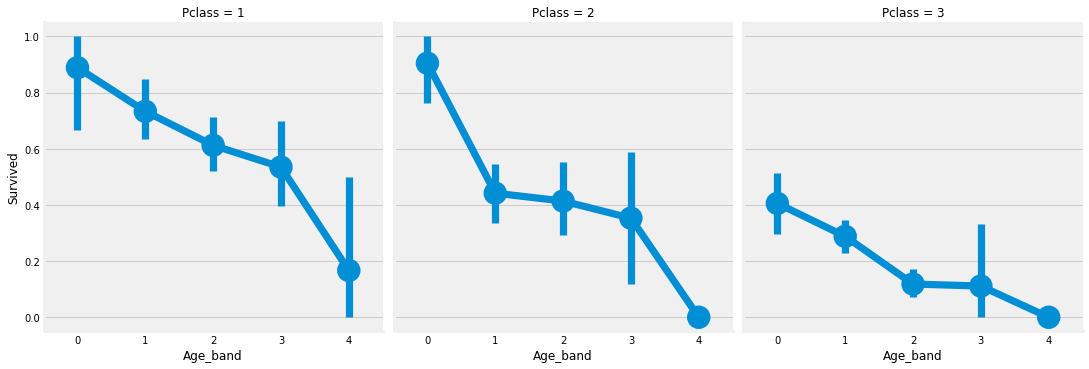

In [58]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

**생존율은 위에서 보여주듯이 P클래스에 상관없이 나이가 들수록 감소합니다**

*Family_Size and Alone*<br>
**이제 "Family_size" 및 "Alone"이라는 새로운 feature를 만들어 분석할 수 있습니다. <br>이 feature는 Parch와 SibSp의 결합입니다. 승객의 가족 규모와 생존율이 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. <br>참고로 'Alone'은 승객이 혼자인지 아닌지를 나타냅니다.**

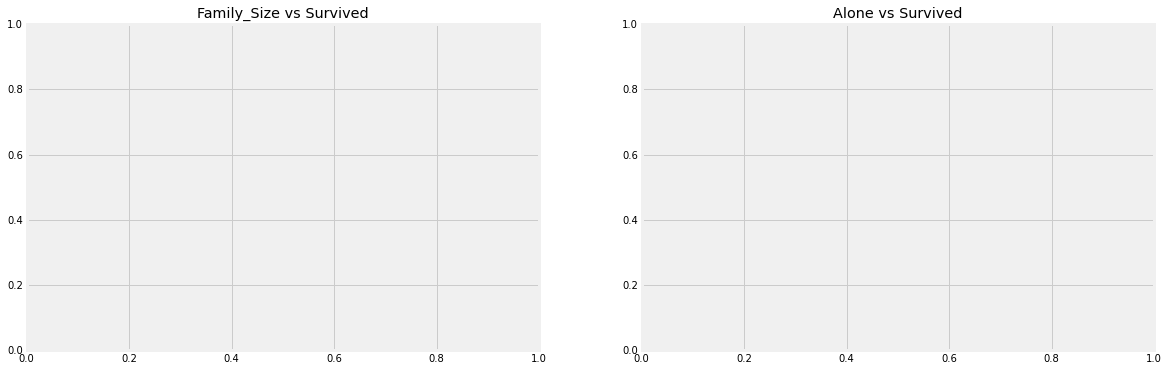

In [59]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0은 승객이 혼자임을 의미합니다. 확실히 혼자이거나 Family_Size=0이면 생존 확률이 매우 낮습니다. Family_Size=0 > 4일 경우 확률도 감소합니다. 이 또한 모델에 있어 중요한 feature로 보입니다. 이 부분을 좀 더 살펴보겠습니다!**

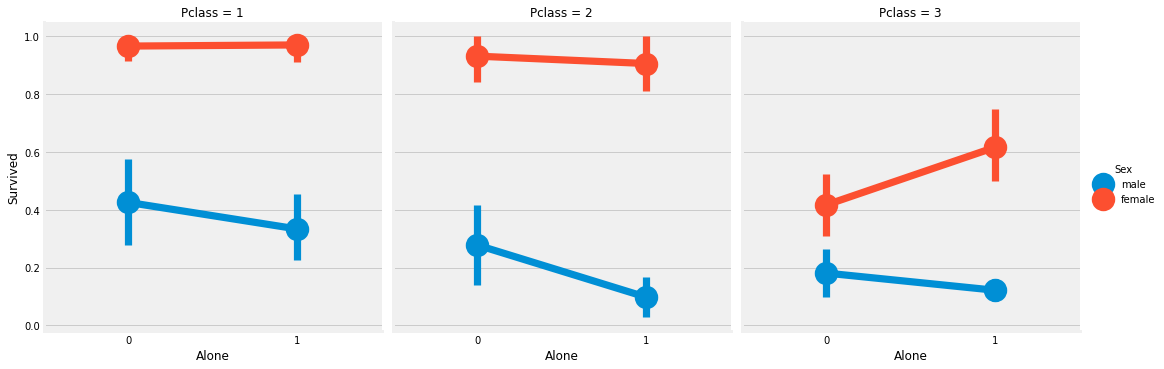

In [60]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

**가족이 있는 여성보다 혼자 있을 확률이 높은 P클래스3를 제외하면 혼자 있는 것이 성별과 P클래스 구분 없이 해로운 것으로 나타났습니다.**

*Fare_Range*<br>
**요금도 연속적인 feature이기 때문에 서수 값으로 환산해야 합니다. Panda.qcut을 사용하겠습니다.**

**따라서 qcut은 우리가 passt한 bin의 수에 따라 값을 분할하거나 정렬합니다. 따라서 5개의 bin을 pass하면 값이 5개의 bin 또는 값 범위로 동일한 간격으로 배열됩니다.**

In [61]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


**위에서 논의한 바와 같이, 요금범위가 증가할수록 생존 가능성이 증가한다는 것을 명확히 알 수 있습니다.**

**이제 Fare_Range 값을 그대로 전달할 수 없습니다. Age_Band에서처럼 개체 값으로 변환해야 합니다.**

In [62]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

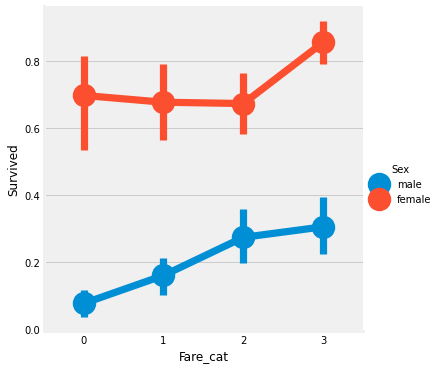

In [63]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

**분명히 Fare_cat이 증가할수록 생존 확률은 높아집니다. 이 기능은 성별과 함께 모델링 시 중요한 feature가 될 수 있습니다.**

*Converting String Values into Numeric*<br>
**머신 러닝 모델에 문자열을 전달할 수 없기 때문에 Sex, Encarded 등의 feature를 numeric 값으로 변환해야 합니다.**

In [64]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

*Dropping UnNeeded Features*  # 불필요한 Features 버리기<br>
**Name--> name feature를 범주형 값으로 변환할 수 없으므로 필요하지 않습니다.**

**age--> Age_band feature가 있으니 필요 없습니다.**

**Ticket--> 분류할 수 없는 랜덤의 문자열입니다.**

**Fare--> Fare_cat feature가 있어서 불필요합니다.**

**Cabin--> NaN 값도 많고 많은 승객이 여러 개의 객실이 있습니다. 그래서 이것은 쓸모없는 feature입니다.**

**Fare_Range--> Fare_cat feature가 있습니다.**

**PassengerId--> 분류할 수 없습니다.**

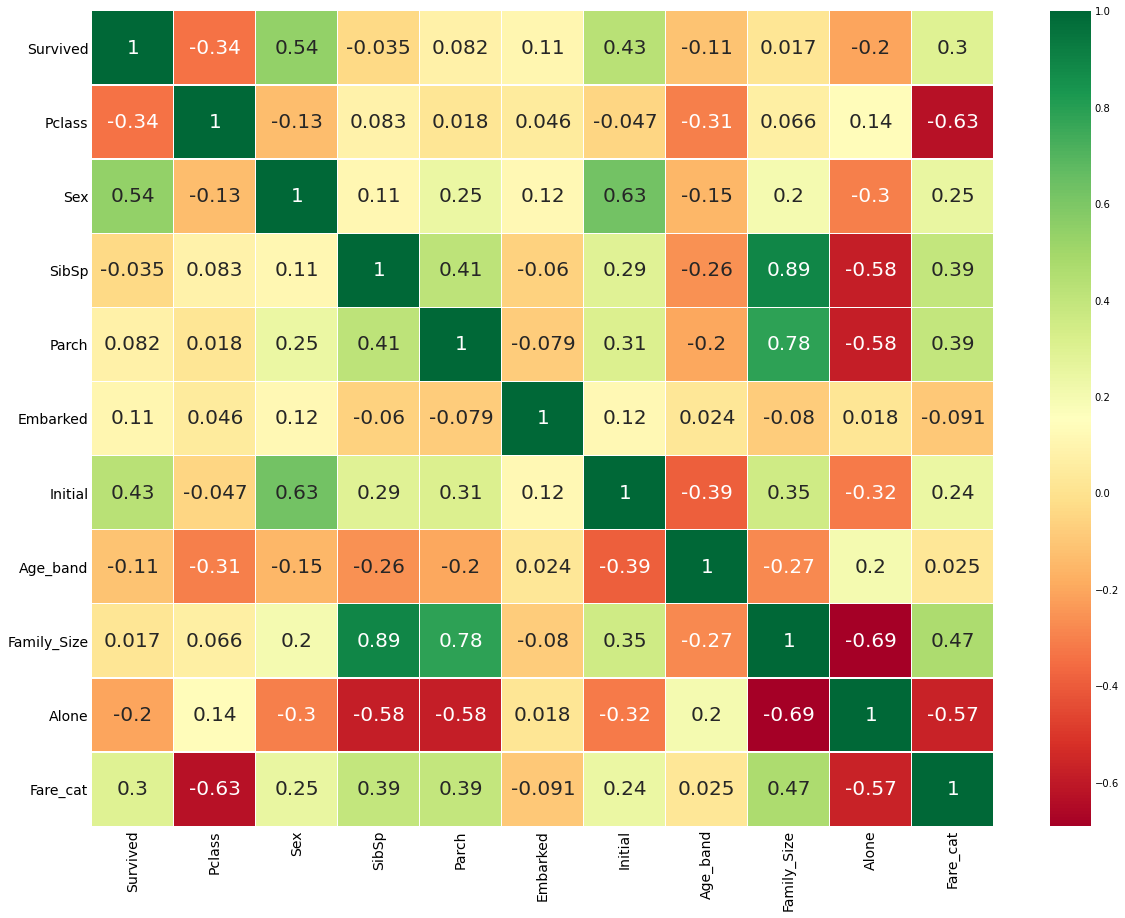

In [65]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**상관 관계를 보여주는 위의 plot에서는 몇 가지 상관관계를 띄는 feature를 확인할 수 있습니다.<br>
양의 상관관계 : SibSp와 Family_Size , Parch 와 Family_Size<br>
음의 상관관계 : Alone과 Family_Size**